In [ ]:
# CUSTOMER CHURN ANALYSIS & CLASSIFICATION
# =========================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# 2. Load Dataset
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")
print("Dataset shape:", df.shape)

Dataset shape: (64374, 12)


In [ ]:
# 3. Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# 4. Define Features & Target
X = df.drop("Churn", axis=1)
y = df["Churn"]
X

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,1,22,0,25,14,4,27,0,1,598,9
1,2,41,0,28,28,7,13,2,1,584,20
2,3,47,1,27,10,2,29,1,0,757,21
3,4,35,1,9,12,5,17,1,2,232,18
4,5,53,0,58,24,9,2,2,0,533,18
...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,0,33,12,6,21,0,2,947,14
64370,64371,37,1,6,1,5,22,2,0,923,9
64371,64372,25,1,39,14,8,30,1,1,327,20
64372,64373,50,0,18,19,7,22,2,1,540,13


In [ ]:
y

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
64369,1
64370,1
64371,1
64372,1


In [ ]:
# 5. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# 7. Try Multiple Classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n==== {name} ====")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


==== Logistic Regression ====
Accuracy: 0.8654
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6793
           1       0.86      0.86      0.86      6082

    accuracy                           0.87     12875
   macro avg       0.86      0.86      0.86     12875
weighted avg       0.87      0.87      0.87     12875

Confusion Matrix:
 [[5929  864]
 [ 869 5213]]

==== Decision Tree ====
Accuracy: 0.9983
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Confusion Matrix:
 [[6783   10]
 [  12 6070]]

==== Random Forest ====
Accuracy: 0.9979
Classification Report:
               precision    recall  f1-score   supp


Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.865398
1        Decision Tree  0.998291
2        Random Forest  0.997903
3    Gradient Boosting  0.996272


/tmp/ipython-input-174274421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


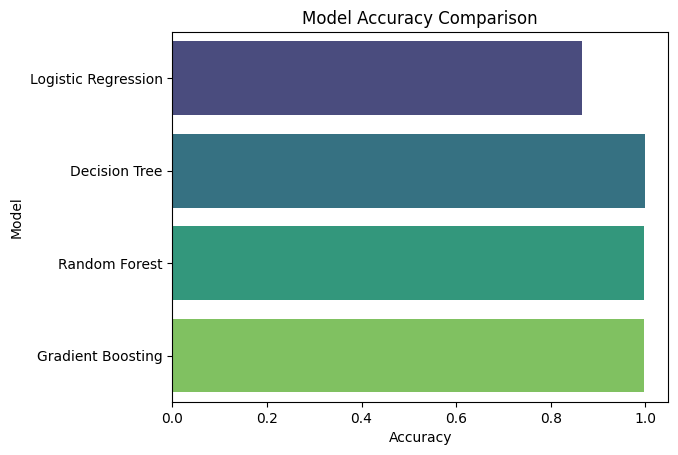

In [ ]:
# 8. Compare Model Accuracies
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nModel Comparison:\n", results_df)
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
# 9. Identify Key Factors (using Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)

/tmp/ipython-input-228312611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")


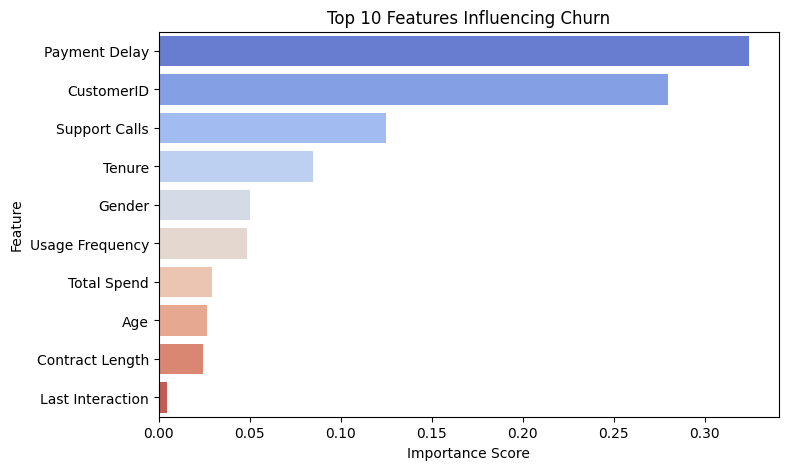

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="coolwarm")
plt.title("Top 10 Features Influencing Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()